In [102]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pprint
from scipy.stats import pearsonr
from scipy import stats
from scipy.interpolate import CubicSpline
import warnings
warnings.filterwarnings("ignore")
import arviz as az
import scipy
import matplotlib.patches as patches
import statsmodels.stats.api as sms
import scipy.stats.kde as kde

# Read data

In [91]:
df_data = pd.read_csv('../../DaiLab_data/SCFA_16S_combined.csv', index_col=0)
df_data = df_data[df_data.Group=='Inulin']
df_data = df_data.drop(['Group','Vendor'], axis=1)
df_data.columns = [c.replace('/','_slash_').replace(' ','_space_').replace('[','_leftsquarebracket_').replace(']','_rightsquarebracket_').replace('-','_dash_').replace('(','_leftroundbracket').replace(')','_rightroundbracket_').replace('.','_dot_') for c in df_data.columns]
df_data.head()

,Mice_ID,Day,Acetate,Butyrate,Propionate,Muribaculaceae,Bacteroides_dash_acidifaciens,Akkermansia_dash_muciniphila,Faecalibaculum,Bacteroides,...,Fusicatenibacter,Candidatus_dash_Arthromitus,Peptoniphilus,Lactococcus_dash_raffinolactis,_leftsquarebracket_Ruminococcus_rightsquarebracket__dash_gnavus_dash_group,bacterium_dash_enrichment_dash_culture_dash_clone_dash_M153,Pseudarthrobacter,Clostridiales_dash_bacterium_dash_CIEAF_dash_021,Bacteroides_dash_sp_dot__dash_Smarlab_dash_3302398,Bradyrhizobium
sample411,GI1,0,12.466773,3.631182,2.244246,8.398360e+06,1.942158e+05,2.028706e+05,2.977975e+06,1.500066e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample412,GI2,0,8.106016,0.942044,1.438978,1.473775e+07,3.435396e+05,7.843649e+05,4.417373e+06,8.056461e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample413,GI3,0,8.612628,2.301846,1.962431,2.567783e+07,5.742474e+05,2.938166e+06,4.286108e+06,7.482618e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample414,GI4,0,8.486632,1.867931,2.035315,1.713879e+07,2.136960e+05,9.663181e+05,7.853327e+06,1.724564e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample426,GI1,1,8.228369,3.541504,5.440075,8.074142e+07,1.698820e+08,3.588429e+06,4.177472e+07,5.828791e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Plot pairwise correlation (no normalization)

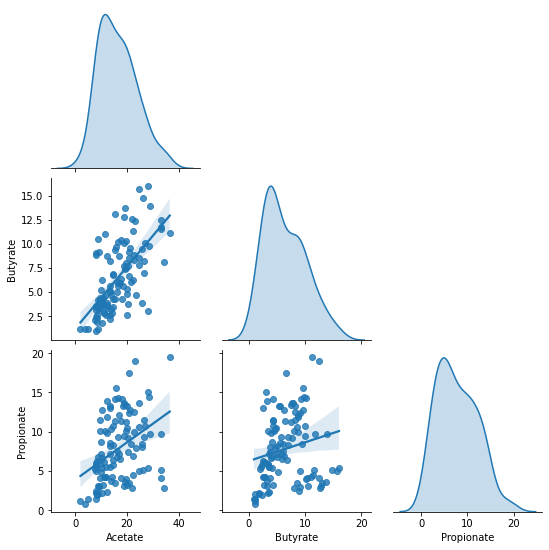

In [37]:
g = sns.pairplot(df_data[['Acetate','Butyrate','Propionate','Diet']], kind='reg', hue='Diet',corner=True, diag_kind="kde")

In [38]:
df_data.loc[df_data.Diet==0,['Acetate','Butyrate','Propionate']].corr()

AttributeError: 'DataFrame' object has no attribute 'Diet'

In [13]:
df_data.loc[df_data.Diet==1,['Acetate','Butyrate','Propionate']].corr()

,Acetate,Butyrate,Propionate
Acetate,1.000000,0.640543,0.400002
Butyrate,0.640543,1.000000,0.201395
Propionate,0.400002,0.201395,1.000000


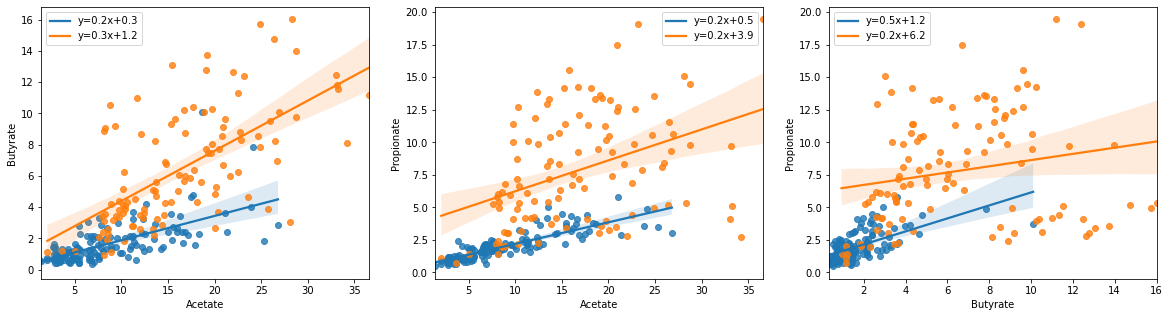

In [14]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

array1 = ['Acetate','Acetate','Butyrate']
array2 = ['Butyrate','Propionate','Propionate']

k=0
for x,y in zip(array1, array2):
    df_data_cellulose = df_data[df_data.Diet==0]
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_data_cellulose[x],df_data_cellulose[y])
    _ = sns.regplot(df_data_cellulose[x],df_data_cellulose[y], fit_reg=True, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, ax=ax[k])

    df_data_inulin = df_data[df_data.Diet==1]
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_data_inulin[x],df_data_inulin[y])
    _ = sns.regplot(df_data_inulin[x],df_data_inulin[y], fit_reg=True, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, ax=ax[k])
    _ = ax[k].legend()
    
    k += 1

# Calculate derivative

In [92]:
df_scfa = df_data[['Mice_ID','Day','Acetate','Butyrate','Propionate']]
df_scfa_deriv = deepcopy(df_scfa)
for curr_mice in set(df_scfa_deriv.Mice_ID):
    curr_df = df_scfa[df_scfa.Mice_ID==curr_mice]
    for scfa in ['Acetate','Butyrate','Propionate']:
        xdata = np.array(curr_df['Day'])
        ydata = np.array(curr_df[scfa])
        cs = CubicSpline(xdata, ydata)
        csd1 = cs.derivative(nu=1)
        ydata_d1 = csd1(xdata)
        df_scfa_deriv.loc[df_scfa.Mice_ID==curr_mice, scfa] = ydata_d1
    
df_scfa_deriv = df_scfa_deriv[['Acetate','Butyrate','Propionate']]
df_scfa_deriv.head()

,Acetate,Butyrate,Propionate
sample411,-11.331097,-1.456967,1.658890
sample412,4.127181,3.888098,13.125370
sample413,11.745672,5.345893,14.519866
sample414,14.622299,4.552023,11.448899
sample426,1.576644,1.048318,4.307852


In [93]:
len(df_scfa_deriv.index)

112

# Normalization

In [94]:
# normalize bacteria data using 
df_bacteria = df_data[df_data.columns[5:]]
df_bacteria = df_bacteria/df_bacteria.max().max()
df_bacteria.head()

,Muribaculaceae,Bacteroides_dash_acidifaciens,Akkermansia_dash_muciniphila,Faecalibaculum,Bacteroides,Lachnospiraceae_dash_NK4A136_dash_group,Parabacteroides_dash_goldsteinii,Parasutterella,Alloprevotella,Lachnospiraceae,...,Fusicatenibacter,Candidatus_dash_Arthromitus,Peptoniphilus,Lactococcus_dash_raffinolactis,_leftsquarebracket_Ruminococcus_rightsquarebracket__dash_gnavus_dash_group,bacterium_dash_enrichment_dash_culture_dash_clone_dash_M153,Pseudarthrobacter,Clostridiales_dash_bacterium_dash_CIEAF_dash_021,Bacteroides_dash_sp_dot__dash_Smarlab_dash_3302398,Bradyrhizobium
sample411,0.022591,0.000522,0.000546,0.008011,0.004035,0.001920,0.000220,0.000626,0.013980,0.004940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample412,0.039644,0.000924,0.002110,0.011883,0.002167,0.012038,0.000766,0.000755,0.027295,0.014074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample413,0.069072,0.001545,0.007904,0.011529,0.002013,0.007090,0.000749,0.000519,0.010622,0.015127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample414,0.046103,0.000575,0.002599,0.021125,0.000464,0.010594,0.000270,0.001253,0.005216,0.012654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sample426,0.217191,0.456975,0.009653,0.112372,0.156792,0.008253,0.000355,0.121258,0.021098,0.012452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Select top 30

In [95]:
df_bacteria_transpose = df_bacteria.transpose()
df_bacteria_transpose['mean'] = df_bacteria_transpose.mean(axis=1)
df_bacteria_transpose = df_bacteria_transpose.sort_values(by=['mean'],axis=0,ascending=False)
df_bacteria_transpose = df_bacteria_transpose.drop('mean', axis=1)
df_bacteria = df_bacteria_transpose.transpose()
df_bacteria = df_bacteria.iloc[:,0:30]
df_bacteria.head()

,Muribaculaceae,Akkermansia_dash_muciniphila,Bacteroides_dash_acidifaciens,Bacteroides_dash_uniformis,Parasutterella,Faecalibaculum,Bacteroides,Clostridia_dash_UCG_dash_014,Lachnospiraceae_dash_NK4A136_dash_group,Alloprevotella,...,Bacteroides_dash_vulgatus_dash_ATCC_dash_8482,Clostridia_dash_vadinBB60_dash_group,Colidextribacter,Ruminococcus_dash_sp_dot__dash_N15_dot_MGS_dash_57,Oscillibacter,Lachnospiraceae_dash_bacterium_dash_28_dash_4,Rikenellaceae_dash_RC9_dash_gut_dash_group,Parabacteroides,Desulfovibrio,Lactobacillus
sample411,0.022591,0.000546,0.000522,0.000319,0.000626,0.008011,0.004035,0.000166,0.001920,0.013980,...,0.0,0.001388,0.001053,0.000000,0.001036,0.000130,0.002175,0.003505,0.000134,0.000231
sample412,0.039644,0.002110,0.000924,0.000649,0.000755,0.011883,0.002167,0.001088,0.012038,0.027295,...,0.0,0.000542,0.005934,0.000000,0.002579,0.000395,0.005915,0.011258,0.000594,0.000725
sample413,0.069072,0.007904,0.001545,0.000630,0.000519,0.011529,0.002013,0.002791,0.007090,0.010622,...,0.0,0.000720,0.005156,0.000014,0.003864,0.000360,0.007587,0.006942,0.000695,0.000302
sample414,0.046103,0.002599,0.000575,0.000245,0.001253,0.021125,0.000464,0.000335,0.010594,0.005216,...,0.0,0.001074,0.002761,0.000000,0.001656,0.000257,0.002574,0.002178,0.000391,0.000446
sample426,0.217191,0.009653,0.456975,0.005100,0.121258,0.112372,0.156792,0.000585,0.008253,0.021098,...,0.0,0.000652,0.000959,0.000058,0.000460,0.000920,0.003595,0.016113,0.000115,0.000671


In [96]:
list(df_bacteria.columns)

['Muribaculaceae',
 'Akkermansia_dash_muciniphila',
 'Bacteroides_dash_acidifaciens',
 'Bacteroides_dash_uniformis',
 'Parasutterella',
 'Faecalibaculum',
 'Bacteroides',
 'Clostridia_dash_UCG_dash_014',
 'Lachnospiraceae_dash_NK4A136_dash_group',
 'Alloprevotella',
 'Lachnospiraceae',
 'Escherichia_dash_Shigella',
 'Parabacteroides_dash_goldsteinii',
 'Desulfovibrionaceae',
 'Helicobacter_dash_ganmani',
 'Oscillospiraceae',
 'Mucispirillum_dash_schaedleri',
 'Lachnospiraceae_dash_bacterium_dash_10_dash_1',
 'Muribaculum',
 'Roseburia',
 'Bacteroides_dash_vulgatus_dash_ATCC_dash_8482',
 'Clostridia_dash_vadinBB60_dash_group',
 'Colidextribacter',
 'Ruminococcus_dash_sp_dot__dash_N15_dot_MGS_dash_57',
 'Oscillibacter',
 'Lachnospiraceae_dash_bacterium_dash_28_dash_4',
 'Rikenellaceae_dash_RC9_dash_gut_dash_group',
 'Parabacteroides',
 'Desulfovibrio',
 'Lactobacillus']

# Write stan program

In [115]:
json_str ='{\n"N" : %d,\n'%(len(df_bacteria.index))

# scfa
v = list(df_scfa_deriv['Propionate'].astype(str))
json_str += '\"%s\" : [%s],\n'%('dPpadt',','.join(v))

# bacteria
for c in df_bacteria.columns:
    v = list(df_bacteria[c].astype(str))
    json_str += '\"%s\" : [%s]'%(c,','.join(v))
    if c != df_bacteria.columns[-1]:
        json_str += ',\n'
json_str += '\n}'
print(json_str)

text_file = open("/Users/liaoc/Documents/cmdstan-2.24.1/examples/mice_scfa_producer/mice_scfa_producer.data.json", "w")
text_file.write("%s" % json_str)
text_file.close()

{
"N" : 112,
"dPpadt" : [1.6588895668239205,13.125369631441963,14.519865725126653,11.448898768958525,4.307852094716763,4.865214346770469,5.050139181445348,3.6363598907142958,1.957269229225395,-0.3765882105274859,1.4910521413789302,-1.0191559346538888,-1.1845063516395746,0.3007343656546239,1.174801743274283,1.0880565524888297,-0.6624831633955469,-0.6259958699696654,-2.976594743412104,0.5401777959569067,-0.12541414797288788,-0.46999582762565606,-0.48543666633655164,-0.5206430069080854,0.25713060127066684,0.051278625234366,0.9558564689984733,0.21031850750447206,-0.4568288475049498,-0.20444411403353321,1.0321018527839425,-1.0172606556326127,1.2690814849472973,-0.42941384523883364,-3.2975505997880923,1.0086430692499984,20.789509840878406,11.021309751553892,-0.3833824120966445,2.514472388000385,2.07585459000971,3.8210003840850377,4.621551786087367,4.041494807445453,-3.6479339095507384,2.065840969185746,1.3114014541732941,0.6532584413206057,2.923701429786639,1.841387977042675,-0.7155085783162

In [116]:
# data {
#     int<lower=0> N;
#     vector[N] x;
#     vector[N] y;
# }
# parameters {
#     real alpha;
#     real beta;
#     real<lower=0> sigma;
# }
# model {
#     y ~ normal(alpha + beta * x, sigma);
# }

model_str = 'data {\n'
model_str += '\tint<lower=0> N;\n'
model_str += '\tvector[N] dPpadt;\n'
for c in df_bacteria.columns:
    model_str += '\tvector[N] %s;\n'%(c)
model_str += '}\nparameters {\n\treal alpha;\n\treal<lower=0,upper=1> sigma;\n'
for c in df_bacteria.columns:
    model_str += '\treal beta__%s;\n'%(c)
model_str += '}\nmodel {\n\talpha ~ normal(0,1);\n\tsigma ~ uniform(0,1);\n'
for c in df_bacteria.columns:
    model_str += '\tbeta__%s ~ normal(0,1);\n'%(c)
model_str += '\tdPpadt ~ normal(alpha'
for c in df_bacteria.columns:
    model_str += '+beta__%s*%s'%(c,c)
model_str += ', sigma);\n}'
print(model_str)

text_file = open("/Users/liaoc/Documents/cmdstan-2.24.1/examples/mice_scfa_producer/mice_scfa_producer.stan", "w")
text_file.write("%s" % model_str)
text_file.close()

data {
	int<lower=0> N;
	vector[N] dPpadt;
	vector[N] Muribaculaceae;
	vector[N] Akkermansia_dash_muciniphila;
	vector[N] Bacteroides_dash_acidifaciens;
	vector[N] Bacteroides_dash_uniformis;
	vector[N] Parasutterella;
	vector[N] Faecalibaculum;
	vector[N] Bacteroides;
	vector[N] Clostridia_dash_UCG_dash_014;
	vector[N] Lachnospiraceae_dash_NK4A136_dash_group;
	vector[N] Alloprevotella;
	vector[N] Lachnospiraceae;
	vector[N] Escherichia_dash_Shigella;
	vector[N] Parabacteroides_dash_goldsteinii;
	vector[N] Desulfovibrionaceae;
	vector[N] Helicobacter_dash_ganmani;
	vector[N] Oscillospiraceae;
	vector[N] Mucispirillum_dash_schaedleri;
	vector[N] Lachnospiraceae_dash_bacterium_dash_10_dash_1;
	vector[N] Muribaculum;
	vector[N] Roseburia;
	vector[N] Bacteroides_dash_vulgatus_dash_ATCC_dash_8482;
	vector[N] Clostridia_dash_vadinBB60_dash_group;
	vector[N] Colidextribacter;
	vector[N] Ruminococcus_dash_sp_dot__dash_N15_dot_MGS_dash_57;
	vector[N] Oscillibacter;
	vector[N] Lachnospiraceae_da

# Plot

In [99]:
def HDI_from_MCMC(posterior_samples, credible_mass):
    # Computes highest density interval from a sample of representative values,
    # estimated as the shortest credible interval
    # Takes Arguments posterior_samples (samples from posterior) and credible mass (normally .95)
    sorted_points = sorted(posterior_samples)
    ciIdxInc = np.ceil(credible_mass * len(sorted_points)).astype('int')
    nCIs = len(sorted_points) - ciIdxInc
    ciWidth = [0]*nCIs
    for i in range(0, nCIs):
        ciWidth[i] = sorted_points[i + ciIdxInc] - sorted_points[i]
    HDImin = sorted_points[ciWidth.index(min(ciWidth))]
    HDImax = sorted_points[ciWidth.index(min(ciWidth))+ciIdxInc]
    return(HDImin, HDImax)

In [100]:
def hpd_grid(sample, alpha=0.05, roundto=2):
    """Calculate highest posterior density (HPD) of array for given alpha. 
    The HPD is the minimum width Bayesian credible interval (BCI). 
    The function works for multimodal distributions, returning more than one mode
    Parameters
    ----------
    
    sample : Numpy array or python list
        An array containing MCMC samples
    alpha : float
        Desired probability of type I error (defaults to 0.05)
    roundto: integer
        Number of digits after the decimal point for the results
    Returns
    ----------
    hpd: array with the lower 
          
    """
    sample = np.asarray(sample)
    sample = sample[~np.isnan(sample)]
    # get upper and lower bounds
    l = np.min(sample)
    u = np.max(sample)
    density = kde.gaussian_kde(sample)
    x = np.linspace(l, u, 2000)
    y = density.evaluate(x)
    #y = density.evaluate(x, l, u) waitting for PR to be accepted
    xy_zipped = zip(x, y/np.sum(y))
    xy = sorted(xy_zipped, key=lambda x: x[1], reverse=True)
    xy_cum_sum = 0
    hdv = []
    for val in xy:
        xy_cum_sum += val[1]
        hdv.append(val[0])
        if xy_cum_sum >= (1-alpha):
            break
    hdv.sort()
    diff = (u-l)/20  # differences of 5%
    hpd = []
    hpd.append(round(min(hdv), roundto))
    for i in range(1, len(hdv)):
        if hdv[i]-hdv[i-1] >= diff:
            hpd.append(round(hdv[i-1], roundto))
            hpd.append(round(hdv[i], roundto))
    hpd.append(round(max(hdv), roundto))
    ite = iter(hpd)
    hpd = list(zip(ite, ite))
    modes = []
    for value in hpd:
        x_hpd = x[(x > value[0]) & (x < value[1])]
        y_hpd = y[(x > value[0]) & (x < value[1])]
        modes.append(round(x_hpd[np.argmax(y_hpd)], roundto))
    return hpd, x, y, modes

## Acetate

In [104]:
fit = az.from_cmdstan(["/Users/liaoc/Documents/cmdstan-2.24.1/results/mice_scfa_producer/acetate/output_%d.csv"%(i) for i in np.arange(1,4)])

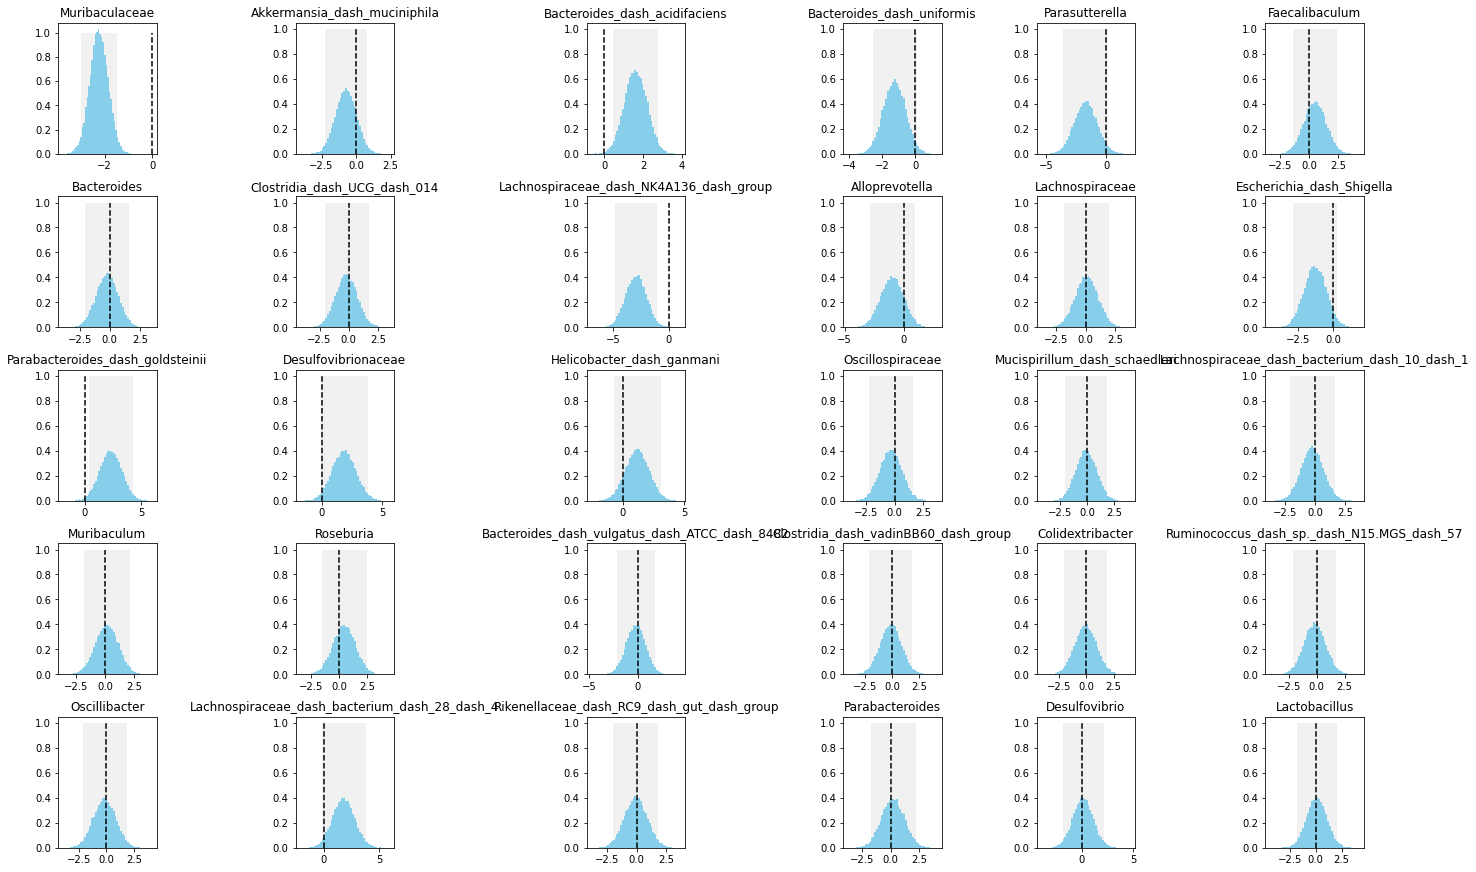

In [108]:
fig, ax = plt.subplots(figsize=(20, 12), nrows=5, ncols=6, constrained_layout=True, sharex=False, sharey=False)

for k,c in enumerate(df_bacteria.columns):
    k1 = int(k/6)
    k2 = k%6
    var = 'beta__%s'%(c)
    data = []
    for i in np.arange(0,3):
        data.extend(list(fit.posterior[var][i].values))
        
    #ci95 = scipy.stats.bayes_mvs(data, alpha=0.95)[0][1]
    #ci95 = HDI_from_MCMC(data,0.95)
    hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(data)
    for (x0, x1) in hpd_mu:
        rect = patches.Rectangle((x0,0),x1-x0,1,linewidth=1,edgecolor=None,facecolor='lightgray',alpha=0.3)
        _ = ax[k1,k2].add_patch(rect)
    ax[k1,k2].hist(data, bins=50, density=True, color='skyblue')
    ax[k1,k2].plot([0,0],[0,1],'k--')
    #ax[k1,k2].plot([np.mean(data),np.mean(data)],[0,20.0],'r--')
#     ax[k1,k2].set_ylim([0,15])

    ax[k1,k2].set_title(c.replace('beta__','').replace('_slash_','/').replace('_space_','').replace('_dot_','.'))
#     if k1==9:
#         ax[k1,k2].set_xlabel('Effect size')
#         if k2==0:
#             ax[k1,k2].set_ylabel(c1.replace('beta__','').replace('_slash_','/').replace('_space_',''))


#         ax[k1,k2].set_ylim([0,upper_bound])
#         ax[k1,k2].set_yticks([0,upper_bound/2,upper_bound])

#     if k2==0:
#         ax[k1,k2].set_xlim([-0.3,0.3])
#         ax[k1,k2].set_xticks([-0.3,0,0.3])
#     if k2==1:
#         ax[k1,k2].set_xlim([-0.2,0.2])
#         ax[k1,k2].set_xticks([-0.2,0,0.2])
#     if k2==2:
#         ax[k1,k2].set_xlim([-0.6,0.3])
#         ax[k1,k2].set_xticks([-0.6,-0.3,0,0.3])
#     if k2==3:
#         ax[k1,k2].set_xlim([-0.8,0.8])
#         ax[k1,k2].set_xticks([-0.8,0,0.8])
#     if k2==4:
#         ax[k1,k2].set_xlim([-2,1])
#         ax[k1,k2].set_xticks([-2,-1,0,1])
#     if k2==5:
#         ax[k1,k2].set_xlim([-1.2,0.6])
#         ax[k1,k2].set_xticks([-1.2,-0.6,0,0.6])
#     if k2==6:
#         ax[k1,k2].set_xlim([-1,2])
#         ax[k1,k2].set_xticks([-1,0,1,2])
#     if k2==7:
#         ax[k1,k2].set_xlim([-1,0.5])
#         ax[k1,k2].set_xticks([-1,-0.5,0,0.5])
#     if k2==8:
#         ax[k1,k2].set_xlim([-0.4,0.4])
#         ax[k1,k2].set_xticks([-0.4,0,0.4])
#     if k2==9:
#         ax[k1,k2].set_xlim([-0.8,0.8])
#         ax[k1,k2].set_xticks([-0.8,0,0.8])
            
plt.show()

## Butyrate

In [113]:
fit = az.from_cmdstan(["/Users/liaoc/Documents/cmdstan-2.24.1/results/mice_scfa_producer/butyrate/output_%d.csv"%(i) for i in np.arange(1,4)])

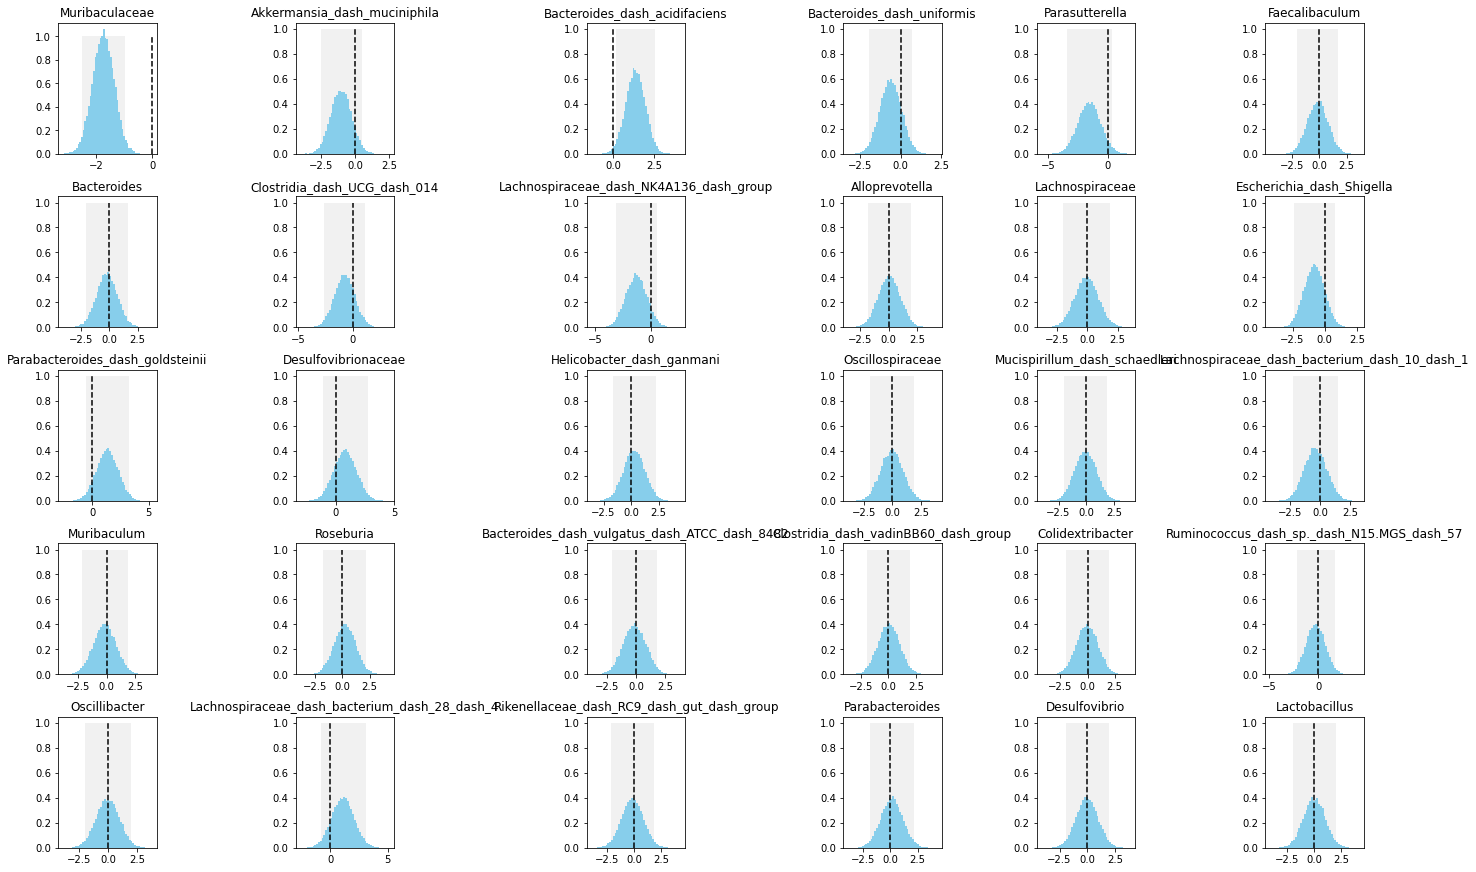

In [114]:
fig, ax = plt.subplots(figsize=(20, 12), nrows=5, ncols=6, constrained_layout=True, sharex=False, sharey=False)

for k,c in enumerate(df_bacteria.columns):
    k1 = int(k/6)
    k2 = k%6
    var = 'beta__%s'%(c)
    data = []
    for i in np.arange(0,3):
        data.extend(list(fit.posterior[var][i].values))
        
    #ci95 = scipy.stats.bayes_mvs(data, alpha=0.95)[0][1]
    #ci95 = HDI_from_MCMC(data,0.95)
    hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(data)
    for (x0, x1) in hpd_mu:
        rect = patches.Rectangle((x0,0),x1-x0,1,linewidth=1,edgecolor=None,facecolor='lightgray',alpha=0.3)
        _ = ax[k1,k2].add_patch(rect)
    ax[k1,k2].hist(data, bins=50, density=True, color='skyblue')
    ax[k1,k2].plot([0,0],[0,1],'k--')
    #ax[k1,k2].plot([np.mean(data),np.mean(data)],[0,20.0],'r--')
#     ax[k1,k2].set_ylim([0,15])

    ax[k1,k2].set_title(c.replace('beta__','').replace('_slash_','/').replace('_space_','').replace('_dot_','.'))
#     if k1==9:
#         ax[k1,k2].set_xlabel('Effect size')
#         if k2==0:
#             ax[k1,k2].set_ylabel(c1.replace('beta__','').replace('_slash_','/').replace('_space_',''))


#         ax[k1,k2].set_ylim([0,upper_bound])
#         ax[k1,k2].set_yticks([0,upper_bound/2,upper_bound])

#     if k2==0:
#         ax[k1,k2].set_xlim([-0.3,0.3])
#         ax[k1,k2].set_xticks([-0.3,0,0.3])
#     if k2==1:
#         ax[k1,k2].set_xlim([-0.2,0.2])
#         ax[k1,k2].set_xticks([-0.2,0,0.2])
#     if k2==2:
#         ax[k1,k2].set_xlim([-0.6,0.3])
#         ax[k1,k2].set_xticks([-0.6,-0.3,0,0.3])
#     if k2==3:
#         ax[k1,k2].set_xlim([-0.8,0.8])
#         ax[k1,k2].set_xticks([-0.8,0,0.8])
#     if k2==4:
#         ax[k1,k2].set_xlim([-2,1])
#         ax[k1,k2].set_xticks([-2,-1,0,1])
#     if k2==5:
#         ax[k1,k2].set_xlim([-1.2,0.6])
#         ax[k1,k2].set_xticks([-1.2,-0.6,0,0.6])
#     if k2==6:
#         ax[k1,k2].set_xlim([-1,2])
#         ax[k1,k2].set_xticks([-1,0,1,2])
#     if k2==7:
#         ax[k1,k2].set_xlim([-1,0.5])
#         ax[k1,k2].set_xticks([-1,-0.5,0,0.5])
#     if k2==8:
#         ax[k1,k2].set_xlim([-0.4,0.4])
#         ax[k1,k2].set_xticks([-0.4,0,0.4])
#     if k2==9:
#         ax[k1,k2].set_xlim([-0.8,0.8])
#         ax[k1,k2].set_xticks([-0.8,0,0.8])
            
plt.show()

## Propionate

In [117]:
fit = az.from_cmdstan(["/Users/liaoc/Documents/cmdstan-2.24.1/results/mice_scfa_producer/propionate/output_%d.csv"%(i) for i in np.arange(1,4)])

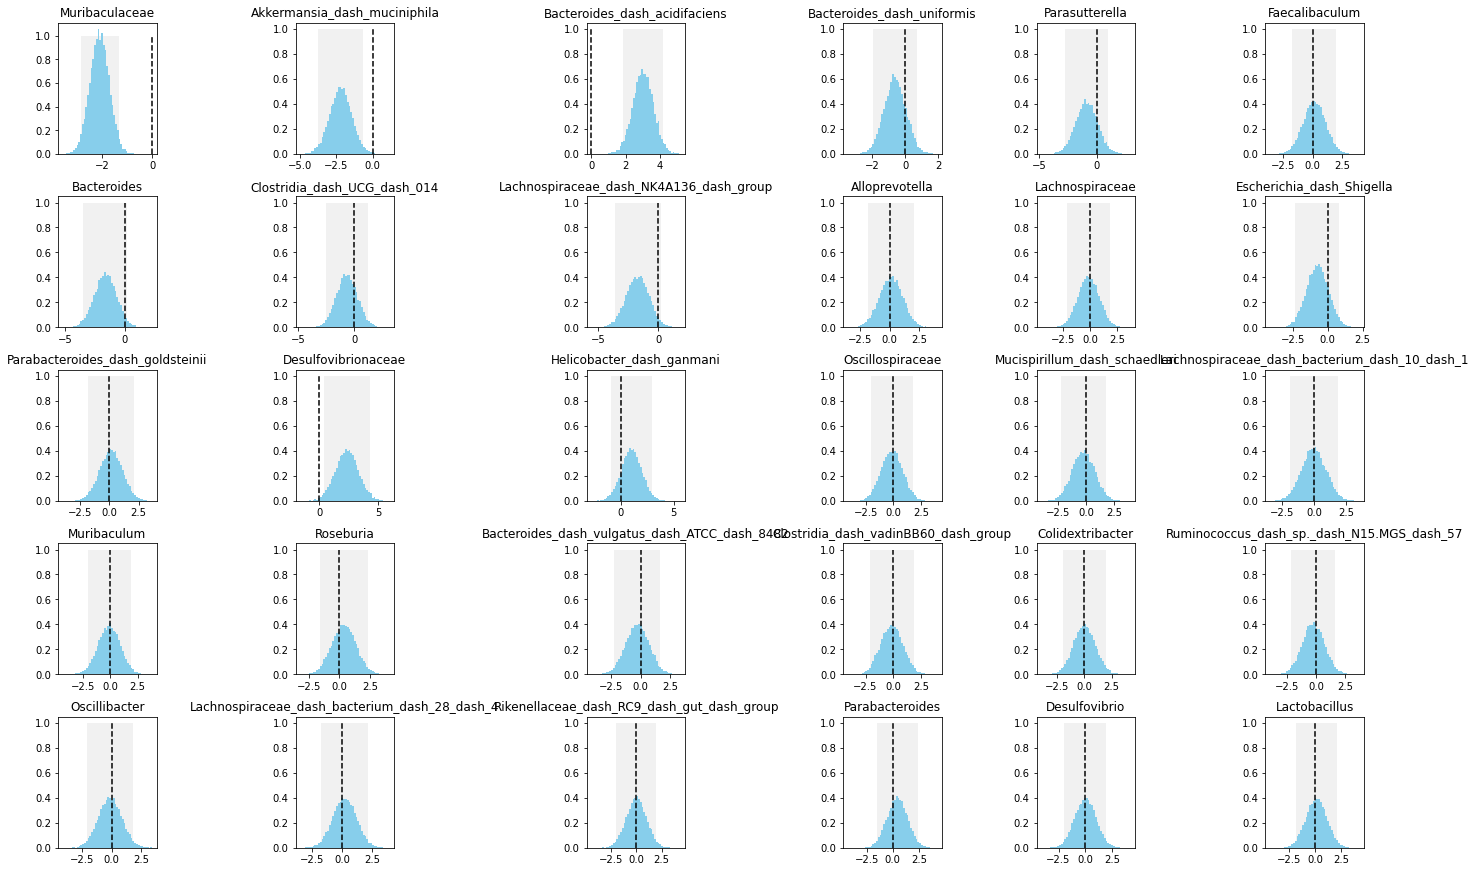

In [118]:
fig, ax = plt.subplots(figsize=(20, 12), nrows=5, ncols=6, constrained_layout=True, sharex=False, sharey=False)

for k,c in enumerate(df_bacteria.columns):
    k1 = int(k/6)
    k2 = k%6
    var = 'beta__%s'%(c)
    data = []
    for i in np.arange(0,3):
        data.extend(list(fit.posterior[var][i].values))
        
    #ci95 = scipy.stats.bayes_mvs(data, alpha=0.95)[0][1]
    #ci95 = HDI_from_MCMC(data,0.95)
    hpd_mu, x_mu, y_mu, modes_mu = hpd_grid(data)
    for (x0, x1) in hpd_mu:
        rect = patches.Rectangle((x0,0),x1-x0,1,linewidth=1,edgecolor=None,facecolor='lightgray',alpha=0.3)
        _ = ax[k1,k2].add_patch(rect)
    ax[k1,k2].hist(data, bins=50, density=True, color='skyblue')
    ax[k1,k2].plot([0,0],[0,1],'k--')
    #ax[k1,k2].plot([np.mean(data),np.mean(data)],[0,20.0],'r--')
#     ax[k1,k2].set_ylim([0,15])

    ax[k1,k2].set_title(c.replace('beta__','').replace('_slash_','/').replace('_space_','').replace('_dot_','.'))
#     if k1==9:
#         ax[k1,k2].set_xlabel('Effect size')
#         if k2==0:
#             ax[k1,k2].set_ylabel(c1.replace('beta__','').replace('_slash_','/').replace('_space_',''))


#         ax[k1,k2].set_ylim([0,upper_bound])
#         ax[k1,k2].set_yticks([0,upper_bound/2,upper_bound])

#     if k2==0:
#         ax[k1,k2].set_xlim([-0.3,0.3])
#         ax[k1,k2].set_xticks([-0.3,0,0.3])
#     if k2==1:
#         ax[k1,k2].set_xlim([-0.2,0.2])
#         ax[k1,k2].set_xticks([-0.2,0,0.2])
#     if k2==2:
#         ax[k1,k2].set_xlim([-0.6,0.3])
#         ax[k1,k2].set_xticks([-0.6,-0.3,0,0.3])
#     if k2==3:
#         ax[k1,k2].set_xlim([-0.8,0.8])
#         ax[k1,k2].set_xticks([-0.8,0,0.8])
#     if k2==4:
#         ax[k1,k2].set_xlim([-2,1])
#         ax[k1,k2].set_xticks([-2,-1,0,1])
#     if k2==5:
#         ax[k1,k2].set_xlim([-1.2,0.6])
#         ax[k1,k2].set_xticks([-1.2,-0.6,0,0.6])
#     if k2==6:
#         ax[k1,k2].set_xlim([-1,2])
#         ax[k1,k2].set_xticks([-1,0,1,2])
#     if k2==7:
#         ax[k1,k2].set_xlim([-1,0.5])
#         ax[k1,k2].set_xticks([-1,-0.5,0,0.5])
#     if k2==8:
#         ax[k1,k2].set_xlim([-0.4,0.4])
#         ax[k1,k2].set_xticks([-0.4,0,0.4])
#     if k2==9:
#         ax[k1,k2].set_xlim([-0.8,0.8])
#         ax[k1,k2].set_xticks([-0.8,0,0.8])
            
plt.show()

# Lasso

In [110]:
rows = []
for scfa in ['Acetate','Butyrate','Propionate']:
    print(scfa)
    dydt = np.asarray(list(df_scfa_deriv[scfa]))
    X = np.asarray(df_bacteria.values)
    reg = LassoCV(
        eps=1e-4,
        n_alphas=10000,
        cv=5,
        random_state=0,
        max_iter=100000,
        tol=1e-6
    ).fit(X, dydt)
    clf = Lasso(alpha=reg.alpha_, 
                random_state=0,
                max_iter=100000,
                tol=1e-6
               ).fit(X,dydt)
    rows.append([scfa, reg.alpha_, clf.score(X,dydt)]+ list(clf.coef_))
df_lasso = pd.DataFrame(rows, columns=['SCFA','BestAlpha','R2']+list(df_bacteria.columns)).set_index('SCFA')
df_lasso = df_lasso.loc[:, (df_lasso != 0).any(axis=0)]
df_lasso.head()

Acetate
Butyrate
Propionate


,BestAlpha,R2,Muribaculaceae,Akkermansia_dash_muciniphila,Bacteroides_dash_acidifaciens
SCFA,,,,,
Acetate,0.059081,0.016217,-1.780794,-0.000000,0.000000
Butyrate,0.099230,0.022006,-0.611365,-0.000000,0.000000
Propionate,0.031406,0.070224,-1.856254,-1.927978,2.566333


In [175]:
df_lasso.to_csv('lasso_top50_grouped_taxa.csv')

# Elastic net

In [177]:
rows = []
df_bacteria_selected = df_bacteria.iloc[:,0:50]
for scfa in ['Acetate','Butyrate','Propionate']:
    print(scfa)
    dydt = np.asarray(list(df_scfa_deriv[scfa]))
    X = np.asarray(df_bacteria_selected.values)
    l1_ratio = [1e-4, .1, .3, .5, .7, .9, .95, .99, 1]
    reg = ElasticNetCV(
        eps=1e-4,
        n_alphas=10000,
        cv=5,
        random_state=0,
        max_iter=100000,
        tol=1e-6,
        l1_ratio=l1_ratio
    ).fit(X, dydt)
    clf = ElasticNet(l1_ratio=reg.l1_ratio_, 
                     alpha=reg.alpha_, 
                     random_state=0,
                     max_iter=100000,
                     tol=1e-6,
                    ).fit(X,dydt)
    rows.append([scfa, reg.alpha_, reg.l1_ratio_, clf.score(X,dydt)]+ list(clf.coef_))
df_elasticnet = pd.DataFrame(rows, columns=['SCFA','BestAlpha','L1Ratio','R2']+list(df_bacteria_selected.columns)).set_index('SCFA')
df_elasticnet = df_elasticnet.loc[:, (df_elasticnet != 0).any(axis=0)]
df_elasticnet.head()

Acetate
Butyrate
Propionate


,BestAlpha,L1Ratio,R2,Muribaculaceae,Akkermansia-muciniphila,Bacteroides-acidifaciens
SCFA,,,,,,
Acetate,311.997910,0.0001,0.000000,0.000000,-0.000000,0.000000
Butyrate,216.712116,0.0001,0.000000,-0.000000,-0.000000,0.000000
Propionate,0.007831,1.0000,0.045538,-0.208238,-1.786546,4.412639


In [179]:
df_elasticnet.to_csv('elasticnet_top50_grouped_taxa.csv')

# Random forest regression

In [119]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [126]:
scfa='Propionate'
dydt = np.asarray(list(df_scfa_deriv[scfa]))
X = np.asarray(df_bacteria.iloc[:,0:30].values)

rf = RandomForestRegressor()
rf_random = GridSearchCV(
    estimator = rf, 
    param_grid = random_grid, 
    cv = 5, 
    verbose=2, 
    n_jobs = -1)

# Fit the random search model
rf_random.fit(X, dydt)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 20.1min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 650, 1100, 1550, 2000]},
             verbose=2)

In [127]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 650}

In [128]:
# best parameters: bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators

###################
# top 10 taxa group
best_parameters_acetate_10 = ['Acetate',True,10,'sqrt',4,2,200] # acetate
best_parameters_butyrate_10 = ['Butyrate',True,30,'sqrt',4,5,200] # butyrate
best_parameters_propionate_10 = ['Propionate',False,10,'sqrt',4,5,200] # propionate
df_best_parameters_10 = pd.DataFrame([best_parameters_acetate_10,
                                      best_parameters_butyrate_10,
                                      best_parameters_propionate_10],
                                      columns=['SCFA','bootstrap','max_depth','max_features','min_samples_leaf','min_samples_split','n_estimators']).set_index('SCFA')
rows = []
df_bacteria_selected = df_bacteria.iloc[:,0:10]
for scfa in ['Acetate','Butyrate','Propionate']:
    print(scfa)
    dydt = np.asarray(list(df_scfa_deriv[scfa]))
    X = np.asarray(df_bacteria_selected.values)
    regr = RandomForestRegressor(
        random_state=0,
        bootstrap=df_best_parameters_10.loc[scfa,'bootstrap'],
        max_depth=None if str(df_best_parameters_10.loc[scfa,'max_depth'])=='nan' else df_best_parameters_10.loc[scfa,'max_depth'],
        max_features=df_best_parameters_10.loc[scfa,'max_features'],
        min_samples_leaf=df_best_parameters_10.loc[scfa,'min_samples_leaf'],
        min_samples_split=df_best_parameters_10.loc[scfa,'min_samples_split'],
        n_estimators=df_best_parameters_10.loc[scfa,'n_estimators'],
        n_jobs=-1
    )
    clf = regr.fit(X, dydt)
    rows.append([scfa, clf.score(X, dydt)]+ list(clf.feature_importances_))
df_rf_10 = pd.DataFrame(rows, columns=['SCFA','R2']+list(df_bacteria_selected.columns)).set_index('SCFA')
df_rf_10.to_csv('randomforest_top10_grouped_taxa.csv')

###################
# top 20 taxa group
best_parameters_acetate_20 = ['Acetate',True,20,'sqrt',4,5,200] # acetate
best_parameters_butyrate_20 = ['Butyrate',True,None,'sqrt',4,2,200] # butyrate
best_parameters_propionate_20 = ['Propionate',True,20,'sqrt',4,5,200] # propionate
df_best_parameters_20 = pd.DataFrame([best_parameters_acetate_20,
                                      best_parameters_butyrate_20,
                                      best_parameters_propionate_20],
                                      columns=['SCFA','bootstrap','max_depth','max_features','min_samples_leaf','min_samples_split','n_estimators']).set_index('SCFA')
rows = []
df_bacteria_selected = df_bacteria.iloc[:,0:20]
for scfa in ['Acetate','Butyrate','Propionate']:
    print(scfa)
    dydt = np.asarray(list(df_scfa_deriv[scfa]))
    X = np.asarray(df_bacteria_selected.values)
    regr = RandomForestRegressor(
        random_state=0,
        bootstrap=df_best_parameters_20.loc[scfa,'bootstrap'],
        max_depth=None if str(df_best_parameters_20.loc[scfa,'max_depth'])=='nan' else df_best_parameters_20.loc[scfa,'max_depth'],
        max_features=df_best_parameters_20.loc[scfa,'max_features'],
        min_samples_leaf=df_best_parameters_20.loc[scfa,'min_samples_leaf'],
        min_samples_split=df_best_parameters_20.loc[scfa,'min_samples_split'],
        n_estimators=df_best_parameters_20.loc[scfa,'n_estimators'],
        n_jobs=-1
    )
    clf = regr.fit(X, dydt)
    rows.append([scfa, clf.score(X, dydt)]+ list(clf.feature_importances_))
df_rf_20 = pd.DataFrame(rows, columns=['SCFA','R2']+list(df_bacteria_selected.columns)).set_index('SCFA')
df_rf_20.to_csv('randomforest_top20_grouped_taxa.csv')

###################
# top 30 taxa group
best_parameters_acetate_30 = ['Acetate',True,20,'sqrt',1,5,650] # acetate
best_parameters_butyrate_30 = ['Butyrate',True,10,'sqrt',2,2,200] # butyrate
best_parameters_propionate_30 = ['Propionate',False,20,'sqrt',4,2,650] # propionate
df_best_parameters_30 = pd.DataFrame([best_parameters_acetate_30,
                                      best_parameters_butyrate_30,
                                      best_parameters_propionate_30],
                                      columns=['SCFA','bootstrap','max_depth','max_features','min_samples_leaf','min_samples_split','n_estimators']).set_index('SCFA')
rows = []
df_bacteria_selected = df_bacteria.iloc[:,0:30]
for scfa in ['Acetate','Butyrate','Propionate']:
    print(scfa)
    dydt = np.asarray(list(df_scfa_deriv[scfa]))
    X = np.asarray(df_bacteria_selected.values)
    regr = RandomForestRegressor(
        random_state=0,
        bootstrap=df_best_parameters_30.loc[scfa,'bootstrap'],
        max_depth=None if str(df_best_parameters_30.loc[scfa,'max_depth'])=='nan' else df_best_parameters_30.loc[scfa,'max_depth'],
        max_features=df_best_parameters_30.loc[scfa,'max_features'],
        min_samples_leaf=df_best_parameters_30.loc[scfa,'min_samples_leaf'],
        min_samples_split=df_best_parameters_30.loc[scfa,'min_samples_split'],
        n_estimators=df_best_parameters_30.loc[scfa,'n_estimators'],
        n_jobs=-1
    )
    clf = regr.fit(X, dydt)
    rows.append([scfa, clf.score(X, dydt)]+ list(clf.feature_importances_))
df_rf_30 = pd.DataFrame(rows, columns=['SCFA','R2']+list(df_bacteria_selected.columns)).set_index('SCFA')
df_rf_30.to_csv('randomforest_top30_grouped_taxa.csv')

################### 
# top 50 taxa group
best_parameters_acetate_50 = ['Acetate',True,None,'sqrt',2,5,200] # acetate
best_parameters_butyrate_50 = ['Butyrate',True,30,'sqrt',4,2,650] # butyrate
best_parameters_propionate_50 = ['Propionate',True,10,'sqrt',4,2,1100] # propionate
df_best_parameters_50 = pd.DataFrame([best_parameters_acetate_50,
                                      best_parameters_butyrate_50,
                                      best_parameters_propionate_50],
                                      columns=['SCFA','bootstrap','max_depth','max_features','min_samples_leaf','min_samples_split','n_estimators']).set_index('SCFA')
rows = []
df_bacteria_selected = df_bacteria.iloc[:,0:50]
for scfa in ['Acetate','Butyrate','Propionate']:
    print(scfa)
    dydt = np.asarray(list(df_scfa_deriv[scfa]))
    X = np.asarray(df_bacteria_selected.values)
    regr = RandomForestRegressor(
        random_state=0,
        bootstrap=df_best_parameters_50.loc[scfa,'bootstrap'],
        max_depth=None if str(df_best_parameters_50.loc[scfa,'max_depth'])=='nan' else df_best_parameters_50.loc[scfa,'max_depth'],
        max_features=df_best_parameters_50.loc[scfa,'max_features'],
        min_samples_leaf=df_best_parameters_50.loc[scfa,'min_samples_leaf'],
        min_samples_split=df_best_parameters_50.loc[scfa,'min_samples_split'],
        n_estimators=df_best_parameters_50.loc[scfa,'n_estimators'],
        n_jobs=-1
    )
    clf = regr.fit(X, dydt)
    rows.append([scfa, clf.score(X, dydt)]+ list(clf.feature_importances_))
df_rf_50 = pd.DataFrame(rows, columns=['SCFA','R2']+list(df_bacteria_selected.columns)).set_index('SCFA')
df_rf_50.to_csv('randomforest_top50_grouped_taxa.csv')

Acetate
Butyrate
Propionate
Acetate
Butyrate
Propionate
Acetate
Butyrate
Propionate
Acetate
Butyrate
Propionate


# Plot ranking of RF importance

In [135]:
# top 10
df_rf_10 = pd.read_csv('randomforest_top10_grouped_taxa.csv', index_col=0)
df_rf_T_10 = df_rf_10.transpose()
df_r2_10 = df_rf_T_10.loc['R2'].to_frame()
df_rf_T_10 = df_rf_T_10.drop('R2',axis=0).reset_index()
df_rf_T_10 = df_rf_T_10.rename(columns={'index':'Taxon'})
df_rf_T_10['TopX'] = 10

df_rf_T_10_norm = deepcopy(df_rf_T_10)
for scfa in ['Acetate','Butyrate','Propionate']:
    df_rf_T_10_norm[scfa] = df_rf_T_10_norm[scfa]/np.max(df_rf_T_10_norm[scfa])

# top 20
df_rf_20 = pd.read_csv('randomforest_top20_grouped_taxa.csv', index_col=0)
df_rf_T_20 = df_rf_20.transpose()
df_r2_20 = df_rf_T_20.loc['R2'].to_frame()
df_rf_T_20 = df_rf_T_20.drop('R2',axis=0).reset_index()
df_rf_T_20 = df_rf_T_20.rename(columns={'index':'Taxon'})
df_rf_T_20['TopX'] = 20

df_rf_T_20_norm = deepcopy(df_rf_T_20)
for scfa in ['Acetate','Butyrate','Propionate']:
    df_rf_T_20_norm[scfa] = df_rf_T_20_norm[scfa]/np.max(df_rf_T_20_norm[scfa])

# top 30
df_rf_30 = pd.read_csv('randomforest_top30_grouped_taxa.csv', index_col=0)
df_rf_T_30 = df_rf_30.transpose()
df_r2_30 = df_rf_T_30.loc['R2'].to_frame()
df_rf_T_30 = df_rf_T_30.drop('R2',axis=0).reset_index()
df_rf_T_30 = df_rf_T_30.rename(columns={'index':'Taxon'})
df_rf_T_30['TopX'] = 30

df_rf_T_30_norm = deepcopy(df_rf_T_30)
for scfa in ['Acetate','Butyrate','Propionate']:
    df_rf_T_30_norm[scfa] = df_rf_T_30_norm[scfa]/np.max(df_rf_T_30_norm[scfa])

# top 50
df_rf_50 = pd.read_csv('randomforest_top50_grouped_taxa.csv', index_col=0)
df_rf_T_50 = df_rf_50.transpose()
df_r2_50 = df_rf_T_50.loc['R2'].to_frame()
df_rf_T_50 = df_rf_T_50.drop('R2',axis=0).reset_index()
df_rf_T_50 = df_rf_T_50.rename(columns={'index':'Taxon'})
df_rf_T_50['TopX'] = 50

df_rf_T_50_norm = deepcopy(df_rf_T_50)
for scfa in ['Acetate','Butyrate','Propionate']:
    df_rf_T_50_norm[scfa] = df_rf_T_50_norm[scfa]/np.max(df_rf_T_50_norm[scfa])
    
# combine all dataframe (do not use topX = 10)
df_combined = pd.concat([df_rf_T_10, df_rf_T_20])
df_combined = pd.concat([df_combined, df_rf_T_30])
df_combined = pd.concat([df_combined, df_rf_T_50])

df_combined_norm = pd.concat([df_rf_T_10_norm, df_rf_T_20_norm])
df_combined_norm = pd.concat([df_combined_norm, df_rf_T_30_norm])
df_combined_norm = pd.concat([df_combined_norm, df_rf_T_50_norm])
df_combined_norm.head()

SCFA,Taxon,Acetate,Butyrate,Propionate,TopX
0,Muribaculaceae,0.575157,0.789535,0.596105,10
1,Akkermansia_dash_muciniphila,0.295592,0.281618,0.450240,10
2,Bacteroides_dash_acidifaciens,0.355910,0.279750,0.469622,10
3,Bacteroides_dash_uniformis,0.250322,0.207349,0.216139,10
4,Parasutterella,0.565416,0.576611,0.582335,10


In [137]:
df_combined = df_combined[df_combined.TopX==30]
df_combined

SCFA,Taxon,Acetate,Butyrate,Propionate,TopX
0,Muribaculaceae,0.053027,0.103514,0.049142,30
1,Akkermansia_dash_muciniphila,0.020894,0.027856,0.030802,30
2,Bacteroides_dash_acidifaciens,0.028649,0.023821,0.046116,30
3,Bacteroides_dash_uniformis,0.017640,0.015406,0.015400,30
4,Parasutterella,0.046429,0.051179,0.051286,30
5,Faecalibaculum,0.026464,0.033486,0.026965,30
6,Bacteroides,0.057037,0.044878,0.083975,30
7,Clostridia_dash_UCG_dash_014,0.057954,0.077714,0.043532,30
8,Lachnospiraceae_dash_NK4A136_dash_group,0.026839,0.020316,0.012930,30
9,Alloprevotella,0.027388,0.031137,0.021078,30


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


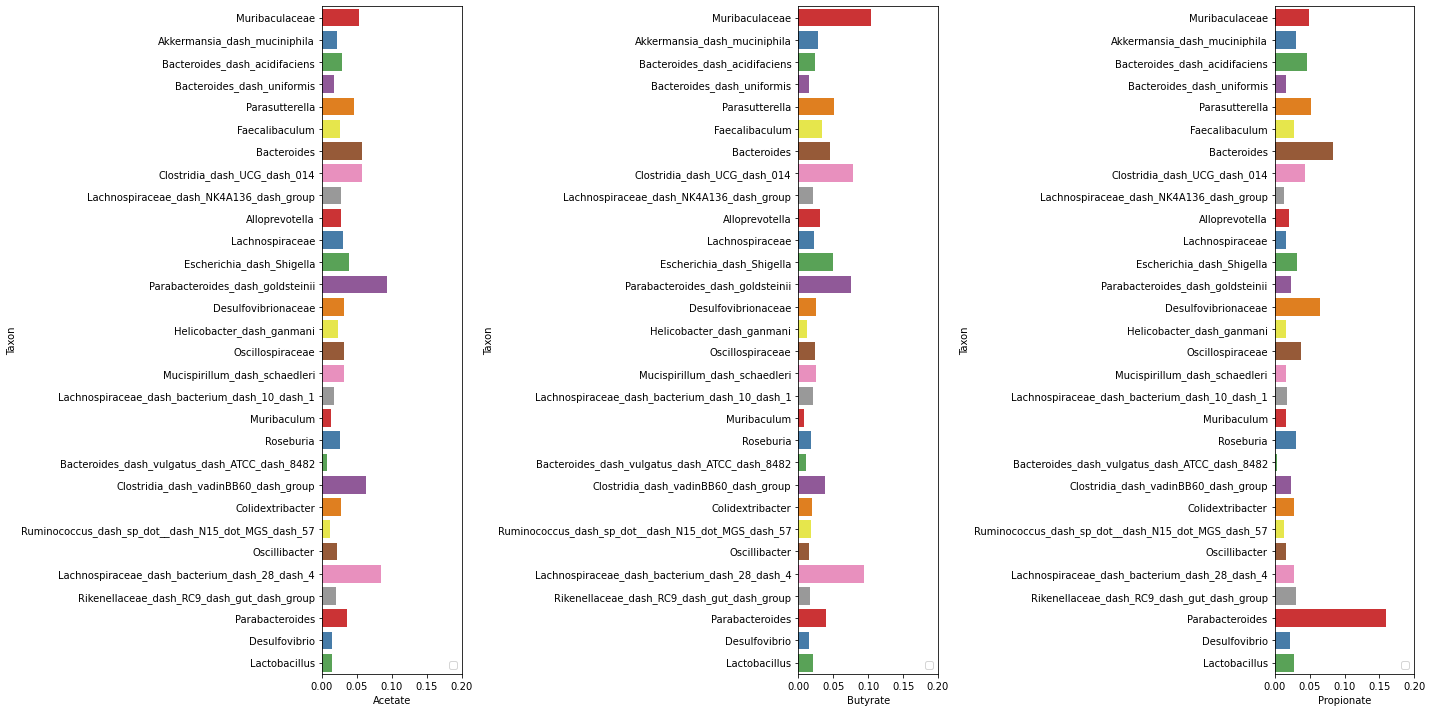

In [138]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=3, constrained_layout=True)
for k,scfa in enumerate(['Acetate','Butyrate','Propionate']):
    curr_df = df_combined[['Taxon','TopX',scfa]]
    _ = sns.barplot(y='Taxon', x=scfa,  data=curr_df, orient='h', ax=ax[k], palette='Set1')
    ax[k].legend(loc='lower right')
    ax[k].set_xlim(0,0.2)
    ax[k].set_xticks([0,0.05,0.1,0.15,0.2])
plt.tight_layout()

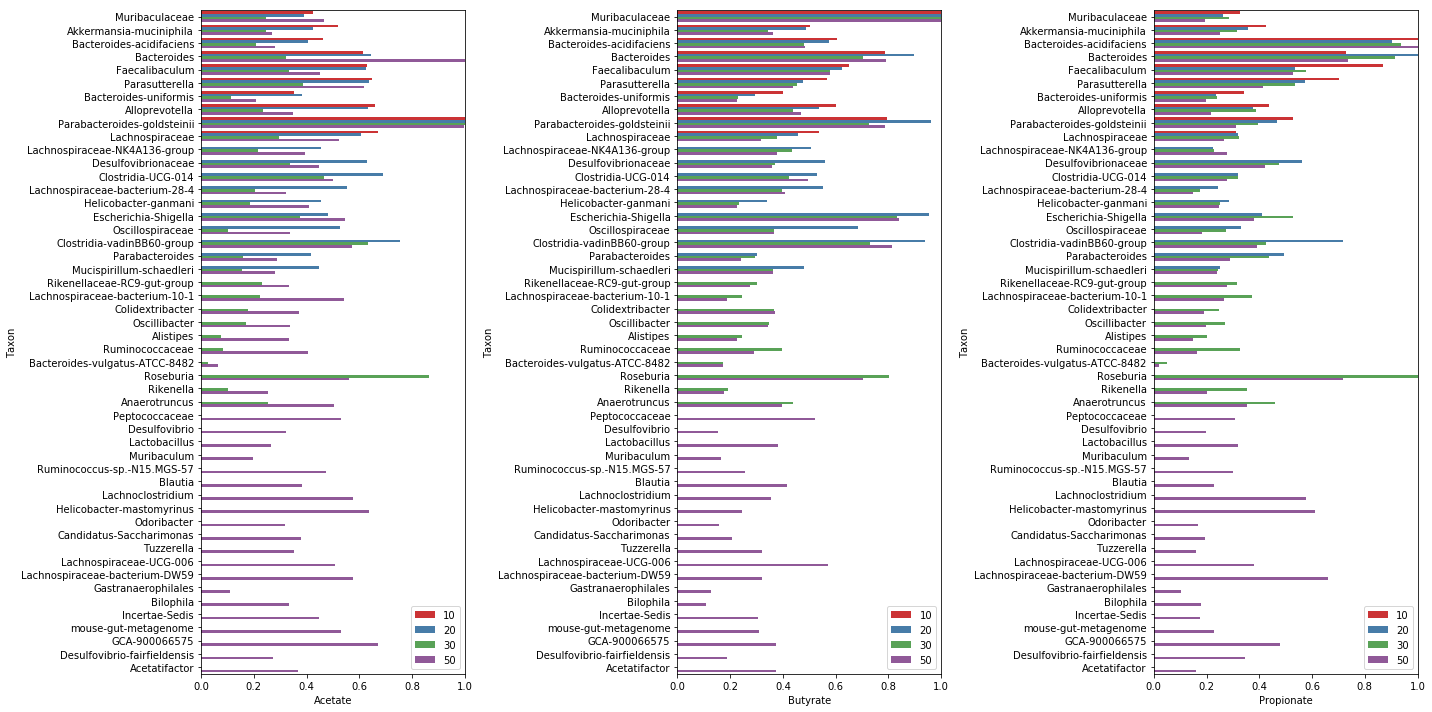

In [335]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=3, constrained_layout=True)
for k,scfa in enumerate(['Acetate','Butyrate','Propionate']):
    curr_df = df_combined_norm[['Taxon','TopX',scfa]]
    _ = sns.barplot(y='Taxon', x=scfa, hue = 'TopX', data=curr_df, orient='h', ax=ax[k], palette='Set1')
    ax[k].legend(loc='lower right')
    ax[k].set_xlim(0,1)
    ax[k].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tight_layout()